In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

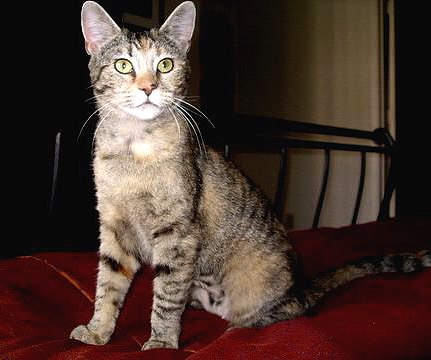

In [5]:
with Image.open('./db/CATS_DOGS/test/CAT/10000.jpg') as im:
        display(im)

In [7]:
path = './db/CATS_DOGS/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [9]:
len(img_names)

24994

In [17]:
img_sizes = []
rejected = []

for item in img_names :
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
            rejected.append(item)

In [21]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [23]:
df = pd.DataFrame(img_sizes)

In [25]:
df.describe()

,0,1
count,24994.000000,24994.000000
mean,404.493518,361.037129
std,108.941802,96.936811
min,42.000000,33.000000
25%,323.000000,302.000000
50%,448.000000,375.000000
75%,500.000000,421.000000
max,500.000000,500.000000


In [27]:
df.head()

,0,1
0,365,500
1,484,500
2,448,500
3,500,483
4,500,375


In [31]:
dog = Image.open('./db/CATS_DOGS/train/DOG/0.jpg')

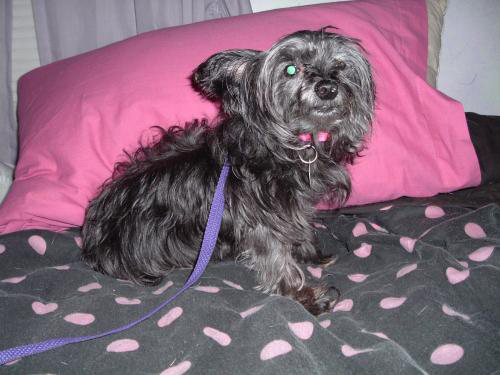

In [35]:
display(dog)

In [37]:
dog.size

(500, 375)

In [39]:
dog.getpixel((0,0))

(117, 115, 126)

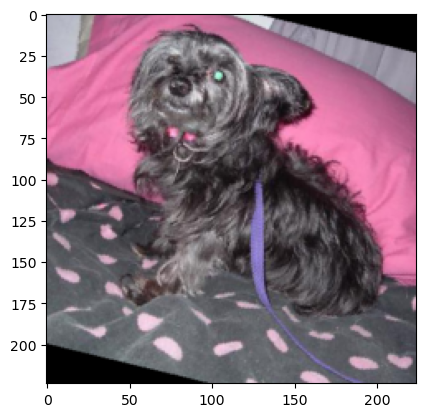

In [45]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


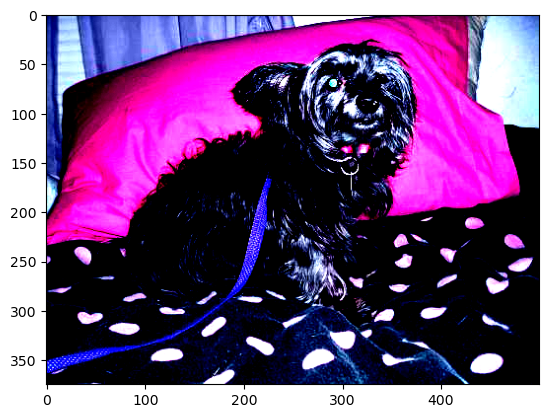

In [49]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [59]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [61]:
test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [69]:
root = './db/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform = train_transforms)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform = test_transforms)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10)

In [73]:
class_names = train_data.classes
class_names

['CAT', 'DOG']

In [75]:
for images, labels in train_loader:
    break
images.shape

torch.Size([10, 3, 224, 224])

In [ ]:
class Cnn(nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = nn.Conv2d(1, 6, 3, 1)
		self.conv2 = nn.Conv2d(6,16, 3, 1)
		self.fc1 = nn.Linear(54*54*16, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84,2)

	def forward(self, x):
		x = F.relu(self.conv1(x))
		x = F.max_pool2d(x, 2,2)
		x = F.relu(self.conv2(x))	
		x = F.max_pool2d(x,2,2)
		x = x.view(-1, 54*54*16)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return F.log_softmax(x, dim=1)


In [ ]:
torch.manual_seed(101)
model = Cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)